## SciPy

SciPy is a library built on top of NumPy which implements algorithms, solvers, and convenience functions for scientific work. It is an enormous library, and this lecture will constitute a shallow tour of of a limited subset of its features. 

Unlike NumPy, SciPy has is organized in terms of subpackages that have to be imported independently. For example, `scipy.linalg`, `scipy.sparse`, `scipy.integrate`, and `scipy.optimize` represent libraries for dense linear algebra, sparse linear algebra, integration and ODE solvers, and optimization/root finding libraries, respectively.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### dense linear algebra

In [16]:
from scipy import linalg

n = 3
A = np.random.random((n,n))
print(A)

[[ 0.51262516  0.81927697  0.02990207]
 [ 0.553457    0.43900113  0.37080495]
 [ 0.97394125  0.35295096  0.81265027]]


In [17]:
# invert a matrix
Ainv = linalg.inv(A)
print(np.dot(A, Ainv))

[[  1.00000000e+00  -1.11022302e-15   3.60822483e-16]
 [ -8.88178420e-16   1.00000000e+00   0.00000000e+00]
 [ -8.88178420e-16   1.77635684e-15   1.00000000e+00]]


But, in practice, there is almost never a reason to explicitly invert a matrix. Instead, we can solve the linear system we care about.

In [22]:
# solve a linear system
b = np.random.rand(n)
x = linalg.solve(A, b)
r = b - np.dot(A, x)
print(r)

[  0.00000000e+00   5.55111512e-16   1.66533454e-16]


In [26]:
# eigenvalues, eigenvectors
lam, v = linalg.eig(A)
print(lam)

# eigenvectors should be unitary
print(np.sum(abs(v**2), axis=0))

[ 1.52784560+0.j          0.11821548+0.09871214j  0.11821548-0.09871214j]
[ 1.  1.  1.]


In [33]:
# SVD
U, S, VH = linalg.svd(A)
print('U = \n{}\n\nS = \n{}\n\nVH = {}\n'.format(U,S,VH))


U = 
[[-0.47144819 -0.82962046 -0.29910949]
 [-0.4699245  -0.05068021  0.88125052]
 [-0.7462624   0.55602285 -0.36596588]]

S = 
[ 1.69520799  0.65587371  0.0325936 ]

VH = [[-0.72473404 -0.50491625 -0.46884981]
 [ 0.13447703 -0.77101553  0.62245561]
 [-0.67577844  0.38806524  0.62668084]]



### interpolation

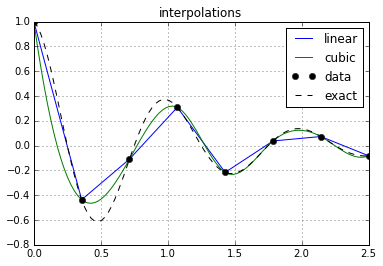

In [59]:
from scipy.interpolate import interp1d

def f(x):
    return np.exp(-x) * np.cos(2*np.pi*x)

# data points
L = 2.5
x_data = np.linspace(0, L, 8)
data = f(x_data)

lin_interp = interp1d(x_data, data)
spline_interp = interp1d(x_data, data, kind='cubic')

xx = np.linspace(0, L, 100)

plt.plot(xx, lin_interp(xx))
plt.plot(xx, spline_interp(xx))
plt.plot(x_data, data, 'ko')
plt.plot(xx, f(xx), 'k--')
plt.legend(['linear', 'cubic', 'data', 'exact'], loc='best')
plt.title('interpolations')
plt.grid()
plt.show()